<a href="https://colab.research.google.com/github/Ani3103/Prasunet_ML_01-02-03/blob/main/Task_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [1]:
!pip install kaggle 
!kaggle datasets download -d samuelcortinhas/cats-and-dogs-image-classification


Dataset URL: https://www.kaggle.com/datasets/samuelcortinhas/cats-and-dogs-image-classification
License(s): CC0-1.0
 88% 57.0M/64.4M [00:00<00:00, 100MB/s] 
100% 64.4M/64.4M [00:00<00:00, 97.4MB/s]


In [2]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cats-and-dogs-image-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [3]:
import tensorflow as tf

# Create a session configuration
config = tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True

# Create an interactive session
session = tf.compat.v1.InteractiveSession(config=config)


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [5]:
#Data Preprocessing
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)


In [6]:
training_set=train_datagen.flow_from_directory('./train',target_size=(64,64),batch_size=32,class_mode='binary')
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('./test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [7]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [9]:
from tensorflow.keras.regularizers import l2

In [10]:
# Part 2 - Building the CNN
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
## For Binary Classification
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

In [11]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
18/18 [==============================] - 7s 295ms/step - loss: 0.9834 - accuracy: 0.5242 - val_loss: 0.9813 - val_accuracy: 0.5786
Epoch 2/15
18/18 [==============================] - 5s 307ms/step - loss: 1.0063 - accuracy: 0.5099 - val_loss: 0.9933 - val_accuracy: 0.5000
Epoch 3/15
18/18 [==============================] - 6s 327ms/step - loss: 0.9581 - accuracy: 0.5422 - val_loss: 0.9802 - val_accuracy: 0.5929
Epoch 4/15
18/18 [==============================] - 5s 277ms/step - loss: 0.9058 - accuracy: 0.5583 - val_loss: 0.9553 - val_accuracy: 0.5786
Epoch 5/15
18/18 [==============================] - 6s 362ms/step - loss: 0.8578 - accuracy: 0.6302 - val_loss: 0.9820 - val_accuracy: 0.5357
Epoch 6/15
18/18 [==============================] - 5s 278ms/step - loss: 0.8748 - accuracy: 0.6140 - val_loss: 0.8923 - val_accuracy: 0.6286
Epoch 7/15
18/18 [==============================] - 5s 285ms/step - loss: 0.7766 - accuracy: 0.6463 - val_loss: 0.8914 - val_accuracy: 0.6286
Epoch 

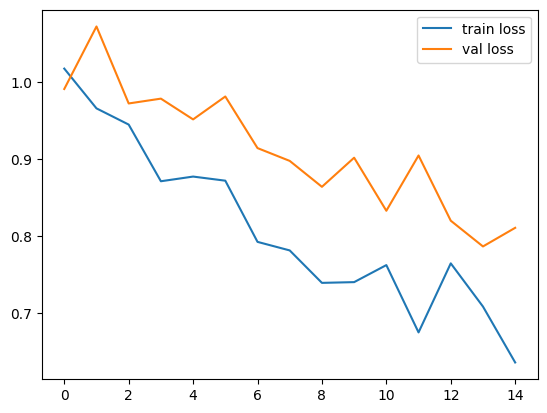

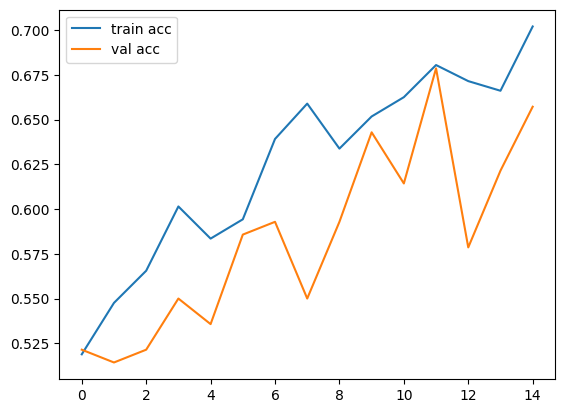

<Figure size 640x480 with 0 Axes>

In [24]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [26]:
# save it as a h5 file


from tensorflow.keras.models import load_model

cnn.save('model_rcat_dog.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
from tensorflow.keras.models import load_model

# load model
model = load_model('model_rcat_dog.h5')

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [32]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/test/dogs/dog_59.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

1/1 [==============================] - 0s 44ms/step


In [23]:
result

array([[-0.1263184]], dtype=float32)

In [20]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/test/cats/cat_106.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

1/1 [==============================] - 0s 21ms/step


In [21]:
result

array([[-0.1263184]], dtype=float32)

In [22]:
if result[0]<0:
    print("The image classified is cat")
else:
    print("The image classified is dog")

The image classified is cat
